In [254]:
from __future__ import annotations
from typing import TypeVar, Generic, Any, Iterator
from dataclasses import dataclass, field
from enum import IntEnum, auto
from termcolor import colored
from graphviz import Digraph, nohtml

T = TypeVar('T')

In [255]:
class NodeColor(IntEnum):
    RED = auto()
    BLACK = auto()
    NIL = auto()


@dataclass
class Node(Generic[T]):
    value: T
    color: NodeColor = NodeColor.RED
    parent_: Node | None = field(default=None)

    def __post_init__(self):
        self.left: Node 
        self.right: Node 

        if self.color != NodeColor.NIL:
            self.left = Node(value=None, color=NodeColor.NIL, parent_=self)
            self.right = Node(value=None, color=NodeColor.NIL, parent_=self)
    
    @property
    def is_nil(self) -> bool:
        return self.color == NodeColor.NIL

    @property
    def is_black(self) -> bool:
        return self.color in [NodeColor.BLACK, NodeColor.NIL]

    def __str__(self) -> str:
        hl = 'on_magenta' if self.is_black else 'on_red'
        return colored(str(self.value), on_color=hl, attrs=['dark'])

    def in_order(self) -> Iterator[Node[T]]:
        if not self.is_nil:
            yield from self.left.in_order()
        yield self
        if not self.is_nil:
            yield from self.right.in_order()

In [256]:
class RBTree(Generic[T]):
    """
    1. Each node is either red or black.
    2. Root node must be black.
    3. All leaves must be black.
    4. Red nodes must have black children.
    5. Every path from a node to a descendant leaf contains the same number of black nodes.
    """
    def __init__(self, value: T) -> None:
        self.root = Node(value, NodeColor.BLACK)
    
    def __iter__(self) -> Iterator[Node]:
        yield from self.root.in_order()

    def __len__(self) -> int:
        return sum(1 for node in self if not node.is_nil)

    def insert(self, value: T) -> None:
        raise NotImplementedError
        node = Node(value)
    
    def _repr_svg_(self) -> str:
        "Jupyter Notebook"
        return self.graphviz()._repr_image_svg_xml()

    def graphviz(self, *args: Any, **kwargs: Any) -> Digraph:
        def style(color: str):
            return {'color': color, 'fillcolor': color}

        if "node_attr" not in kwargs:
            kwargs["node_attr"] = {
                "shape": "record",
                "style": "filled, rounded",
                "fontname": "Hack",
                "fontpath": "./asset/",
                "fontcolor": "white",
            }

        style_colors = [style(c) for c in ['coral2', 'black', 'gray16']]    
        styles = { k:v for k, v in zip(NodeColor, style_colors)}

        digraph = Digraph(*args, **kwargs)

        for node in self:
            node_id = str(id(node))
            digraph.node(node_id, nohtml(f"<l>|<v> {node.value}|<r>"), **styles[node.color])

            if not node.is_nil:
                digraph.edge(f"{node_id}:l", f"{id(node.left)}:v")
                digraph.edge(f"{node_id}:r", f"{id(node.right)}:v")

        return digraph




2


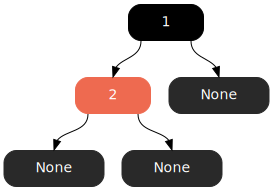

In [257]:
t = RBTree(1)
t.root.left = Node(2, NodeColor.RED, parent_=t.root)
print(len(t))
t